<a href="https://colab.research.google.com/github/Madawi2/Amemia/blob/main/anemia_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats

# **Data preparation**

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/anemia_project/anemia.csv')

In [4]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [5]:
df.shape

(1421, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [7]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [8]:
duplicate = df[df.duplicated(subset=None, keep='first')]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Gender,Hemoglobin,MCH,MCHC,MCV,Result
237,1,14.9,22.7,29.1,83.7,0
238,0,15.9,25.4,28.3,72.0,0
240,0,14.9,16.0,31.4,87.5,0
242,0,11.6,22.3,30.9,74.5,1
243,1,12.7,19.5,28.9,82.9,1
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [9]:
df.drop_duplicates( inplace=True) 
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
946,0,11.8,21.2,28.4,98.1,1
1156,1,15.1,21.3,32.4,100.6,0
1160,1,14.8,19.5,32.2,72.1,0
1376,1,13.2,20.4,28.0,97.4,1


In [10]:
df['gender_name']=df['Gender']
df['gender_name'].replace([1], 'female',inplace=True )
df['gender_name'].replace([0], 'male',inplace=True )
df.head(5)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result,gender_name
0,1,14.9,22.7,29.1,83.7,0,female
1,0,15.9,25.4,28.3,72.0,0,male
2,0,9.0,21.5,29.6,71.2,1,male
3,0,14.9,16.0,31.4,87.5,0,male
4,1,14.7,22.0,28.2,99.5,0,female


In [11]:
df['result']=df['Result']
df['result'].replace([0],'uninfected',inplace=True)
df['result'].replace([1],'infected',inplace=True)
df.head(5)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result,gender_name,result
0,1,14.9,22.7,29.1,83.7,0,female,uninfected
1,0,15.9,25.4,28.3,72.0,0,male,uninfected
2,0,9.0,21.5,29.6,71.2,1,male,infected
3,0,14.9,16.0,31.4,87.5,0,male,uninfected
4,1,14.7,22.0,28.2,99.5,0,female,uninfected


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 1396
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       534 non-null    int64  
 1   Hemoglobin   534 non-null    float64
 2   MCH          534 non-null    float64
 3   MCHC         534 non-null    float64
 4   MCV          534 non-null    float64
 5   Result       534 non-null    int64  
 6   gender_name  534 non-null    object 
 7   result       534 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 37.5+ KB


In [13]:
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result,gender_name,result
0,1,14.9,22.7,29.1,83.7,0,female,uninfected
1,0,15.9,25.4,28.3,72.0,0,male,uninfected
2,0,9.0,21.5,29.6,71.2,1,male,infected
3,0,14.9,16.0,31.4,87.5,0,male,uninfected
4,1,14.7,22.0,28.2,99.5,0,female,uninfected
...,...,...,...,...,...,...,...,...
946,0,11.8,21.2,28.4,98.1,1,male,infected
1156,1,15.1,21.3,32.4,100.6,0,female,uninfected
1160,1,14.8,19.5,32.2,72.1,0,female,uninfected
1376,1,13.2,20.4,28.0,97.4,1,female,infected



# **Data anylasis**


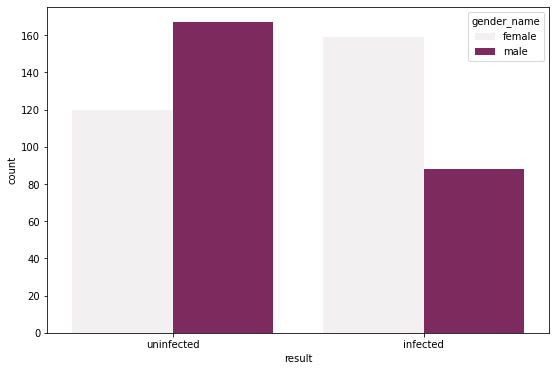

In [14]:
fig = plt.figure(figsize = (9,6))
sns.countplot(x='result' , data=df, hue='gender_name', color='#8B1C62')


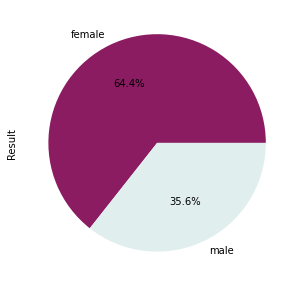

In [15]:
df.groupby('gender_name')['Result'].sum().plot.pie(autopct='%1.1f%%',figsize=(9,5), colors=['#8B1C62','#E0EEEE'])


### Hemoglobin

([<matplotlib.axis.XTick at 0x7f28bf8da8d0>,
 <a list of 11 Text major ticklabel objects>)

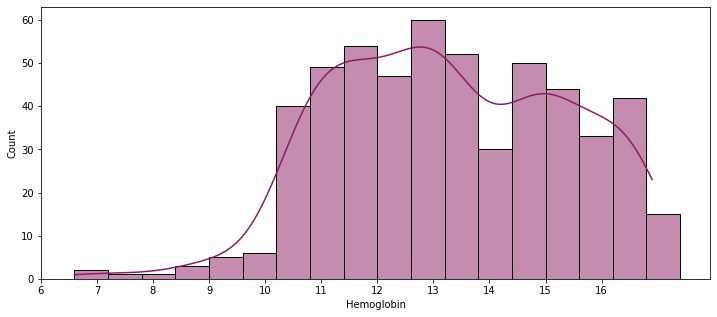

In [16]:
plt.figure(figsize=(12,5))
sns.histplot(df.Hemoglobin,binwidth=0.6,bins=np.arange(6,17,1),color="#8B1C62",kde=True)
plt.xticks(np.arange(6,17,1))

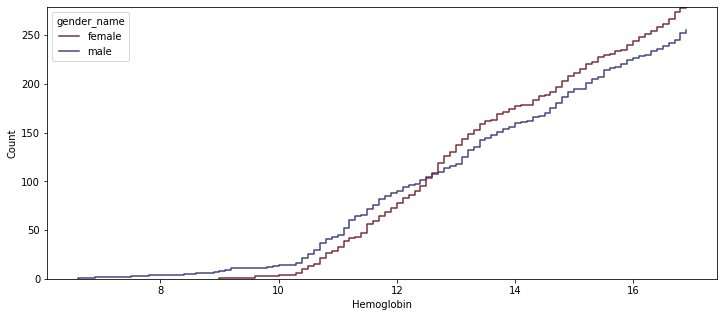

In [17]:
plt.figure(figsize=(12,5))
sns.ecdfplot(x='Hemoglobin', data=df ,stat='count', hue="gender_name", palette='icefire_r')

### (MCH)  

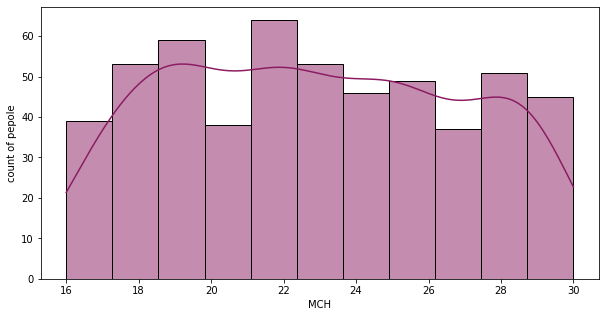

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df.MCH,kde=True,color="#8B1C62")
plt.ylabel('count of pepole')
plt.show()

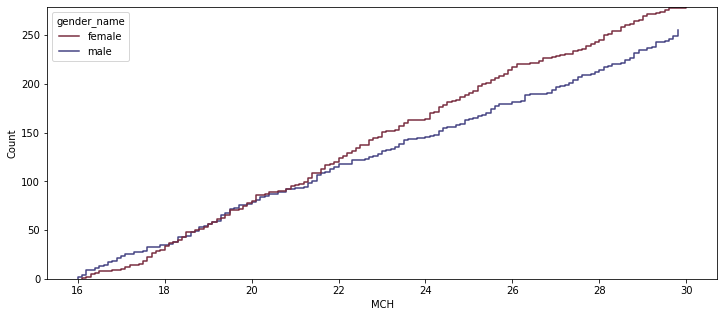

In [19]:
plt.figure(figsize=(12,5))
sns.ecdfplot(x='MCH', data=df ,stat='count', hue="gender_name",palette='icefire_r')

### (MCHC)

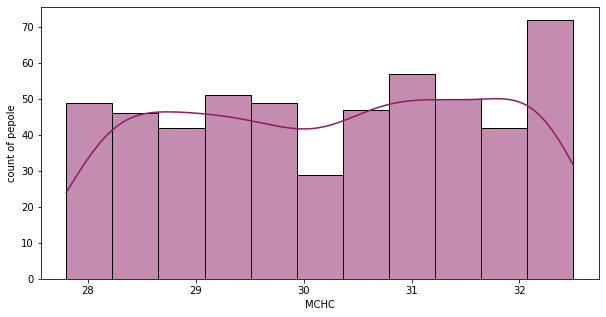

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df.MCHC,kde=True,color="#8B1C62")
plt.ylabel('count of pepole')
plt.show()

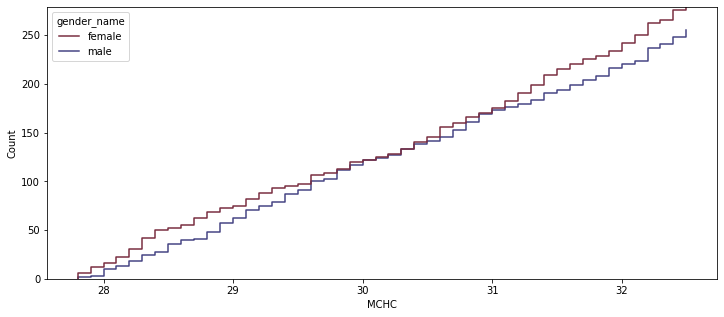

In [21]:
plt.figure(figsize=(12,5))
sns.ecdfplot(x='MCHC', data=df ,stat='count', hue="gender_name",palette='icefire_r')

### (MCV)

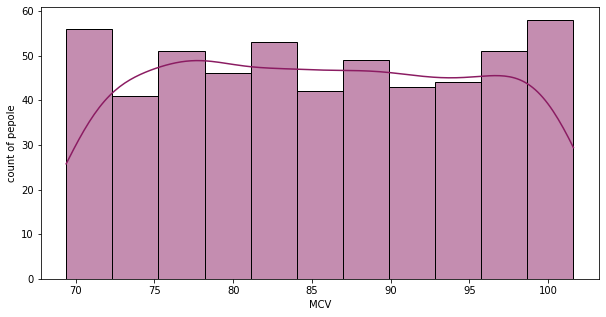

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df.MCV,kde=True,color="#8B1C62")
plt.ylabel('count of pepole')
plt.show()

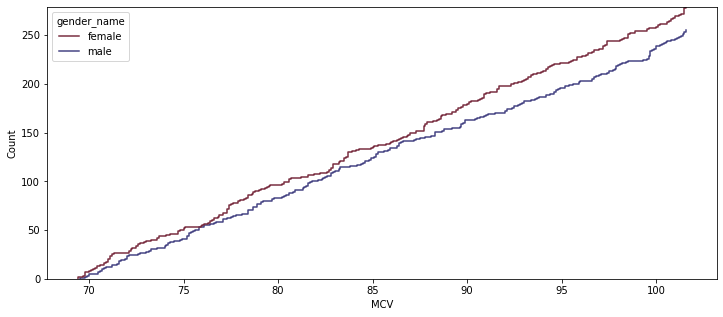

In [23]:
 plt.figure(figsize=(12,5))
sns.ecdfplot(x='MCV', data=df ,stat='count', hue="gender_name",palette='icefire_r')

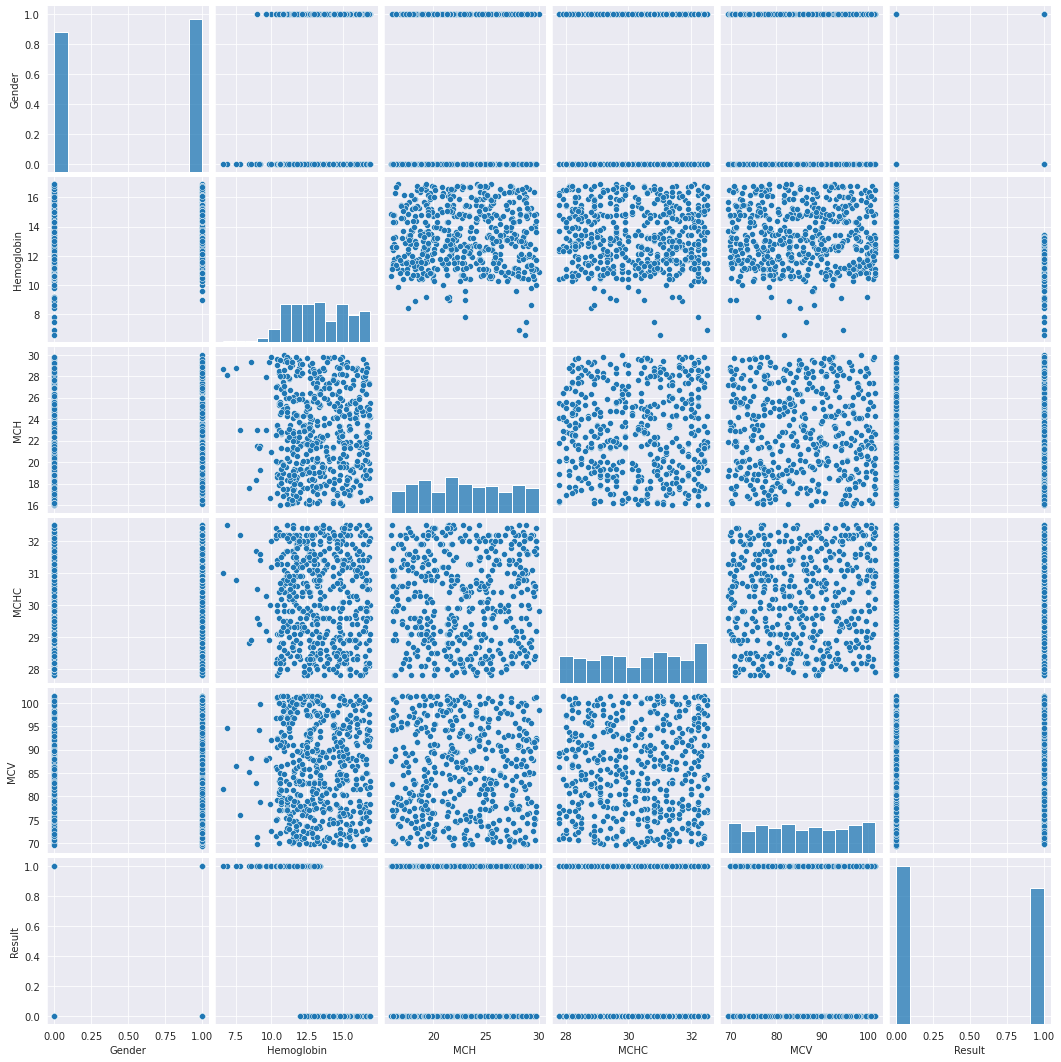

In [24]:
sns.set_style('darkgrid')
sns.pairplot(df)

### the corrlation

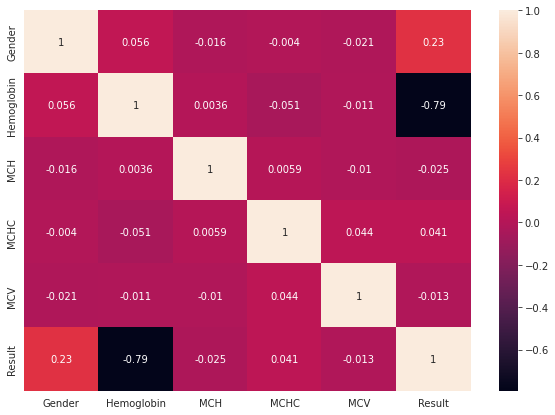

In [25]:
corr=df.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr, annot=True)

# Model building

In [26]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [27]:
##split it as training & testing

In [28]:
y=df['Result']
y

0       0
1       0
2       1
3       0
4       0
       ..
946     1
1156    0
1160    0
1376    1
1396    1
Name: Result, Length: 534, dtype: int64

In [29]:
x=df.drop(['Result','result','gender_name'],axis=1)
x

,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...
946,0,11.8,21.2,28.4,98.1
1156,1,15.1,21.3,32.4,100.6
1160,1,14.8,19.5,32.2,72.1
1376,1,13.2,20.4,28.0,97.4


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [31]:
print(x.shape, x_train.shape, x_test.shape)

(534, 5) (373, 5) (161, 5)


##Model1: stats model

In [32]:
import statsmodels.api as sm
model1=sm.Logit(y_train,x_train)
result1=model1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.094697
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  373
Model:                          Logit   Df Residuals:                      368
Method:                           MLE   Df Model:                            4
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.8628
Time:                        06:30:33   Log-Likelihood:                -35.322
converged:                       True   LL-Null:                       -257.42
Covariance Type:            nonrobust   LLR p-value:                 7.844e-95
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender         9.1566      1.636      5.595      0.000       5.949      12.364
Hemoglobin    -5.2881      0

The p-values for all featurs(x's)< 0.05  are significant to the model exept MCH > 0.05 not significant 


In [33]:
y_pred =result1.predict(x_test)
y_pred

78     1.000000e+00
771    1.033070e-07
171    9.993167e-01
56     9.999996e-01
945    1.632769e-06
           ...     
227    4.610288e-09
160    9.122226e-06
199    2.509203e-06
154    8.463089e-01
940    1.287609e-02
Length: 161, dtype: float64

In [34]:
y_pred1=(result1.predict(x_test)>=0.5).astype(int)
y_pred1

78     1
771    0
171    1
56     1
945    0
      ..
227    0
160    0
199    0
154    1
940    0
Length: 161, dtype: int64

In [35]:
y_test

78     1
771    0
171    1
56     1
945    0
      ..
227    0
160    0
199    0
154    1
940    0
Name: Result, Length: 161, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)


0.9192546583850931

In [37]:
x['interaction']=x['MCV']*x['MCH']
x.head(2)

,Gender,Hemoglobin,MCH,MCHC,MCV,interaction
0,1,14.9,22.7,29.1,83.7,1899.99
1,0,15.9,25.4,28.3,72.0,1828.80


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [39]:
x_test.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,interaction
78,1,10.7,19.0,32.2,77.1,1464.90
771,0,14.7,24.8,29.4,82.4,2043.52
171,1,12.4,23.3,31.3,70.1,1633.33
56,1,10.8,16.8,30.6,79.6,1337.28
945,0,14.3,16.2,29.5,95.2,1542.24


In [40]:
model2=sm.Logit(y_train,x_train)
result2=model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.026063
         Iterations 15
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.962      
Dependent Variable: Result           AIC:              31.4433    
Date:               2022-11-30 06:30 BIC:              54.9728    
No. Observations:   373              Log-Likelihood:   -9.7217    
Df Model:           5                LL-Null:          -257.42    
Df Residuals:       367              LLR p-value:      7.9038e-105
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     15.0000                                       
-------------------------------------------------------------------
              Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Gender        30.8952   12.2522   2.5216  0.0117    6.8814  54.9090
Hemoglobin   -20.2359    8.1883  -2.4713  0.0135

In [41]:
y_pred =result2.predict(x_test)
y_pred 

78     1.000000e+00
771    9.491646e-25
171    1.000000e+00
56     1.000000e+00
945    4.138570e-18
           ...     
227    1.222062e-31
160    1.058160e-18
199    4.689226e-17
154    9.999813e-01
940    4.712675e-07
Length: 161, dtype: float64

In [42]:
y_pred2=(result2.predict(x_test)>=0.5).astype(int)
y_pred2 

78     1
771    0
171    1
56     1
945    0
      ..
227    0
160    0
199    0
154    1
940    0
Length: 161, dtype: int64

In [43]:
y_test

78     1
771    0
171    1
56     1
945    0
      ..
227    0
160    0
199    0
154    1
940    0
Name: Result, Length: 161, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.9503105590062112

In [45]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred2)
cf

array([[80,  6],
       [ 2, 73]])

Text(69.0, 0.5, 'y test')

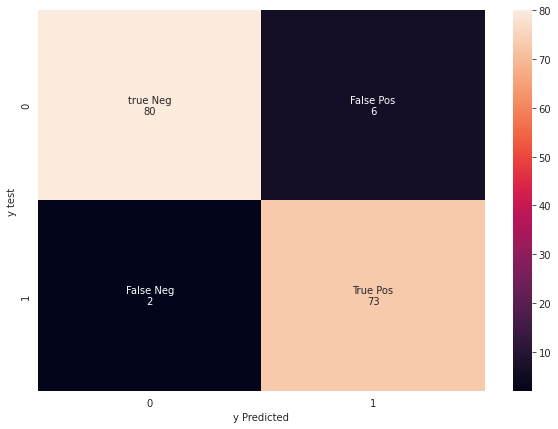

In [46]:
plt.figure(figsize = (10,7))
group_names = ["true Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt="")
plt.xlabel('y Predicted')
plt.ylabel('y test')

In [47]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        86
           1       0.92      0.97      0.95        75

    accuracy                           0.95       161
   macro avg       0.95      0.95      0.95       161
weighted avg       0.95      0.95      0.95       161



## **Model2**: Decision tree

In [48]:
del x['interaction']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [49]:
x

,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...
946,0,11.8,21.2,28.4,98.1
1156,1,15.1,21.3,32.4,100.6
1160,1,14.8,19.5,32.2,72.1
1376,1,13.2,20.4,28.0,97.4


In [50]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

In [68]:
clf = DecisionTreeClassifier(max_leaf_nodes=4)
clf = clf.fit(x_train,y_train)

### Evaluate model preformance

In [69]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0])

In [70]:
x_test.head(5)

,Gender,Hemoglobin,MCH,MCHC,MCV
78,1,10.7,19.0,32.2,77.1
771,0,14.7,24.8,29.4,82.4
171,1,12.4,23.3,31.3,70.1
56,1,10.8,16.8,30.6,79.6
945,0,14.3,16.2,29.5,95.2


In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9440993788819876

In [72]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        86
           1       1.00      0.88      0.94        75

    accuracy                           0.94       161
   macro avg       0.95      0.94      0.94       161
weighted avg       0.95      0.94      0.94       161



In [56]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
clf.predict_proba(x_test)

### **Visualizing Decision Trees**

In [60]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
cf

array([[86,  0],
       [ 9, 66]])

Text(69.0, 0.5, 'y test')

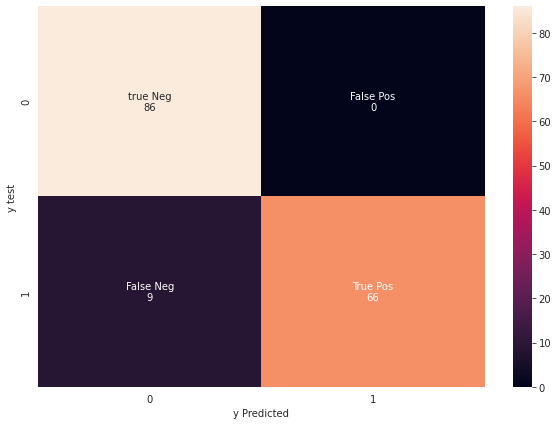

In [61]:
plt.figure(figsize = (10,7))
group_names = ["true Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt="")
plt.xlabel('y Predicted')
plt.ylabel('y test')

In [58]:
x.columns.values

array(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV'], dtype=object)

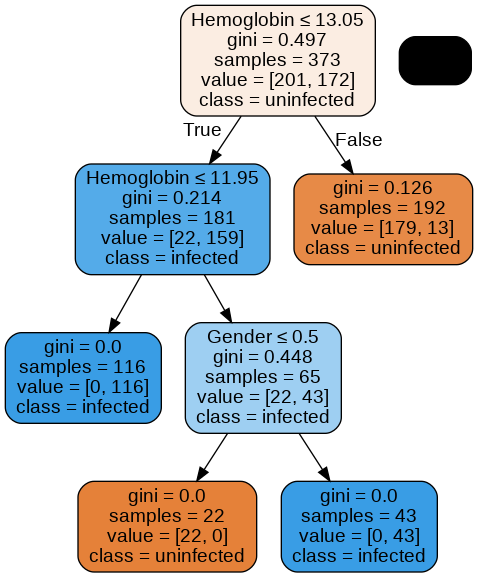

In [73]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = list(x.columns),class_names=['uninfected','infected'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
